# Plot the activations of a feature map

In [1]:
import pickle
import torch

class SaveFeatures():
    def __init__(self, module):
        self.hook = module.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output):
        self.features = torch.tensor(output,requires_grad=True)
    def __remove__(self):
        self.hook.remove()

In [2]:
import pickle

f = open('data/supervised/chars_50.pkl', 'rb')
data = pickle.load(f)
f.close()

In [3]:
train = data[0]
train.shape

(24, 50, 1024)

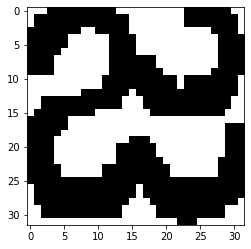

In [4]:
import matplotlib.pyplot as plt

plt.imshow(train[8, 8].reshape(32, 32), cmap='gray')

## Load model

In [5]:
from torch import load, tensor
import src._init_paths
from src.lib.networks.resnet import Telnet

model = Telnet()

model.load_state_dict(load('Logs/new_test3/supervised/resnet/30/model.pth'))

<All keys matched successfully>

In [6]:
list(model.children())[0][3][0][0]


Conv2d(32, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

In [7]:
activations = SaveFeatures(list(model.children())[0][2][0][0])

In [8]:
img = torch.from_numpy(train[8,8]).float()
model(img.view(-1, 1, 32, 32))

/Users/knight/.pyenv/versions/torch/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


tensor([[0.8234, 0.8067, 0.9061, 0.8851, 0.8630, 0.8601, 0.8868, 0.8554, 0.8980,
         0.8501, 0.9034, 0.8785, 0.9722, 0.8889, 0.9079, 0.8802, 0.8570, 0.8809,
         0.8726, 0.7921, 0.9207, 0.9355, 0.9384, 0.8271]],
       grad_fn=<ViewBackward>)

In [9]:
mean_act = [activations.features[0,i].mean().item() for i in range(24)]

1


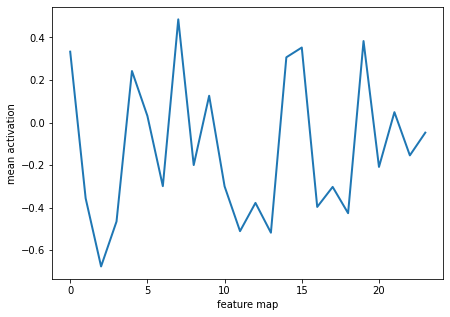

In [10]:
plt.figure(figsize=(7,5))
act = plt.plot(mean_act,linewidth=2.)
print(len(act))
extraticks=[filter]
ax = act[0].axes
ax.set_xlabel("feature map")
ax.set_ylabel("mean activation")
plt.show()

/Users/knight/.pyenv/versions/torch/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


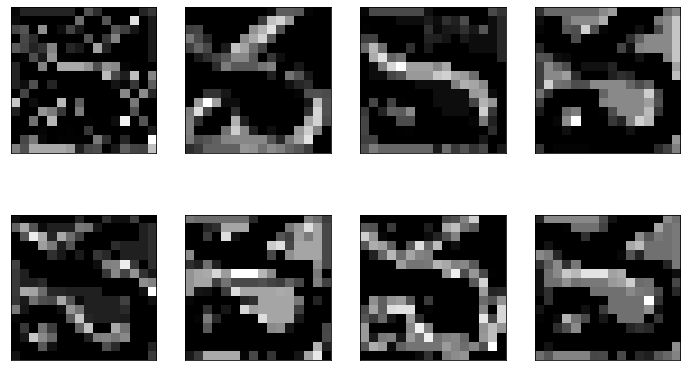

In [60]:
activations = SaveFeatures(list(model.children())[0][0][0])
model(torch.from_numpy(train[2,9].reshape(-1, 1, 32, 32)).float())
size = len(activations.features[0]) // 4
active = activations.features[0].detach().numpy()
ix = 1
plt.figure(figsize=(12,7))
for i in range(size):
    for j in range(4):
        ix = i * 4 + j
        ax = plt.subplot(size, 4, ix + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(active[ix], cmap='gray')
        ix += 1
plt.show()